##  Concepts 0.9.2

In [1]:
pip install concepts

In [2]:
from concepts import Context

In [3]:
c = Context.fromstring('''
...            |human|knight|king |mysterious|
... King Arthur|  X  |  X   |  X  |          |
... Sir Robin  |  X  |  X   |     |          |
... holy grail |     |      |     |     X    |
... ''')

In [4]:
c

<Context object mapping 3 objects to 4 properties [dae7402a] at 0x7fa89dbedcc0>

### Common properties of objects or common objects of properties

In [5]:
c.intension(['King Arthur', 'Sir Robin'])

('human', 'knight')

In [6]:
c.intension(['King Arthur', 'Sir Robin', 'holy grail'])

()

In [7]:
c.intension(['holy grail', 'Sir Robin'])

()

In [8]:
c.extension(['knight','mysterious'])

()

In [9]:
c.extension(['knight','human'])

('King Arthur', 'Sir Robin')

In [10]:
c.extension(['human','mysterious'])


()

In [11]:
c.extension(['knight','mysterious'])

()

In [12]:
c.extension(['human','knight','king'])

('King Arthur',)

In [13]:
c.extension(['mysterious'])

('holy grail',)

### Closest matching objects-properties pair of objects or properties 

In [14]:
c['Sir Robin', 'holy grail']

(('King Arthur', 'Sir Robin', 'holy grail'), ())

In [15]:
c['Sir Robin', 'holy grail','King Arthur']

(('King Arthur', 'Sir Robin', 'holy grail'), ())

In [16]:
c['Sir Robin', 'King Arthur']

(('King Arthur', 'Sir Robin'), ('human', 'knight'))

In [17]:
c['king',]

(('King Arthur',), ('human', 'knight', 'king'))

In [18]:
c['human',]

(('King Arthur', 'Sir Robin'), ('human', 'knight'))

In [19]:
c['knight',]

(('King Arthur', 'Sir Robin'), ('human', 'knight'))

In [20]:
c['mysterious',]

(('holy grail',), ('mysterious',))

## 3) Concept lattice


In [21]:
c.lattice

<Lattice object of 2 atoms 5 concepts 2 coatoms at 0x7fa89c73b898>

In [22]:
print(c.lattice)

<Lattice object of 2 atoms 5 concepts 2 coatoms at 0x7fa89c73b898>
    {} <-> [human knight king mysterious]
    {King Arthur} <-> [human knight king] <=> King Arthur <=> king
    {holy grail} <-> [mysterious] <=> holy grail <=> mysterious
    {King Arthur, Sir Robin} <-> [human knight] <=> Sir Robin <=> human knight
    {King Arthur, Sir Robin, holy grail} <-> []


In [23]:
for extent in c.lattice:
  print('%r' % (extent))

<Infimum {} <-> [human knight king mysterious]>
<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>
<Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>
<Concept {King Arthur, Sir Robin} <-> [human knight] <=> Sir Robin <=> human knight>
<Supremum {King Arthur, Sir Robin, holy grail} <-> []>


In [24]:
for intent in c.lattice:
  print('%r' % (intent))

<Infimum {} <-> [human knight king mysterious]>
<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>
<Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>
<Concept {King Arthur, Sir Robin} <-> [human knight] <=> Sir Robin <=> human knight>
<Supremum {King Arthur, Sir Robin, holy grail} <-> []>


In [25]:
for extent, intent in c.lattice:
  print('%r %r' % (extent, intent))

() ('human', 'knight', 'king', 'mysterious')
('King Arthur',) ('human', 'knight', 'king')
('holy grail',) ('mysterious',)
('King Arthur', 'Sir Robin') ('human', 'knight')
('King Arthur', 'Sir Robin', 'holy grail') ()


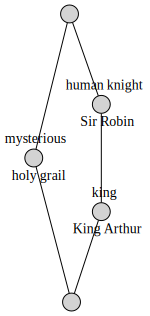

In [26]:
# Graphical Visualization of Concept Lattice
c.lattice.graphviz(view=True)

In [27]:
c.lattice.infimum.upper_neighbors

(<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>,
 <Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>)

In [28]:
c.lattice[1].lower_neighbors


(<Infimum {} <-> [human knight king mysterious]>,)

In [29]:
c.lattice[2].lower_neighbors


(<Infimum {} <-> [human knight king mysterious]>,)

In [30]:
c.lattice[3].lower_neighbors

(<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>,)

# Concepts 0.1.3
### 1) Formal Contexts

In [31]:
c = Context.fromstring('''
...            |human|knight|king |mysterious|
... King Arthur|  X  |  X   |  X  |          |
... Sir Robin  |  X  |  X   |     |          |
... holy grail |     |      |     |     X    |
... ''')

c

<Context object mapping 3 objects to 4 properties [dae7402a] at 0x7fa89c755a90>

In [32]:
 c.objects

('King Arthur', 'Sir Robin', 'holy grail')

In [33]:
c.properties 

('human', 'knight', 'king', 'mysterious')

In [34]:
c.bools

[(True, True, True, False),
 (True, True, False, False),
 (False, False, False, True)]

In [35]:
c.intension(['King Arthur', 'Sir Robin']) 

('human', 'knight')

In [36]:
c.extension(['knight', 'mysterious'])

()

In [37]:
c.extension(['knight', 'king'])

('King Arthur',)

In [38]:
c.extension(['mysterious', 'human'])

()

## 2) Formal Concepts

In [39]:
c['king',]

(('King Arthur',), ('human', 'knight', 'king'))

#### Intent

In [40]:
assert c.intension(('King Arthur',)) == ('human', 'knight', 'king')

In [41]:
assert c.intension(('Sir Robin',)) == ('human', 'knight')

In [42]:
assert c.intension(('holy grail',)) == ('mysterious',)

#### Extent

In [43]:
assert c.extension(('human', 'knight', 'king')) == ('King Arthur',)

In [44]:
# assert c.extension(('human', 'knight',)) == ('Sir Robin',)

In [45]:
assert c.extension(('mysterious',)) == ('holy grail',)

In [46]:
c[('King Arthur', 'Sir Robin')]

(('King Arthur', 'Sir Robin'), ('human', 'knight'))

#### Maximally general concept (Supremum)

In [47]:
c[('Sir Robin', 'holy grail')]

(('King Arthur', 'Sir Robin', 'holy grail'), ())

In [48]:
c[('King Arthur','Sir Robin', 'holy grail')]

(('King Arthur', 'Sir Robin', 'holy grail'), ())

In [49]:
c[('King Arthur','holy grail')]

(('King Arthur', 'Sir Robin', 'holy grail'), ())

#### Minimally general concept (Infimum)

In [50]:
c[('mysterious', 'knight')]

((), ('human', 'knight', 'king', 'mysterious'))

In [51]:
c[('mysterious', 'king')]

((), ('human', 'knight', 'king', 'mysterious'))

In [52]:
c[('mysterious', 'human')]

((), ('human', 'knight', 'king', 'mysterious'))

In [53]:
c[('mysterious', 'human','knight','king')]

((), ('human', 'knight', 'king', 'mysterious'))

## 3) Concept Lattice

In [54]:
c

<Context object mapping 3 objects to 4 properties [dae7402a] at 0x7fa89c755a90>

In [55]:
l=c.lattice

In [56]:
l

<Lattice object of 2 atoms 5 concepts 2 coatoms at 0x7fa89c6e4438>

In [57]:
for extent,intent in l:
  print(extent,intent)

() ('human', 'knight', 'king', 'mysterious')
('King Arthur',) ('human', 'knight', 'king')
('holy grail',) ('mysterious',)
('King Arthur', 'Sir Robin') ('human', 'knight')
('King Arthur', 'Sir Robin', 'holy grail') ()


In [58]:
l.infimum

<Infimum {} <-> [human knight king mysterious]>

In [59]:
l.supremum

<Supremum {King Arthur, Sir Robin, holy grail} <-> []>

In [60]:
l[1]

<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>

In [61]:
l[2]

<Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>

In [62]:
l[('mysterious',)]

<Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>

In [63]:
## Directed Acyclic Graph
l.infimum.upper_neighbors

(<Atom {King Arthur} <-> [human knight king] <=> King Arthur <=> king>,
 <Atom {holy grail} <-> [mysterious] <=> holy grail <=> mysterious>)

In [64]:
l[1].lower_neighbors

(<Infimum {} <-> [human knight king mysterious]>,)

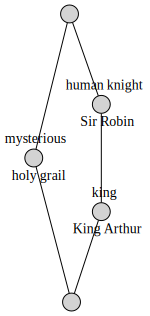

In [65]:
l.graphviz(view=True)

In [66]:
## Description of the graph 
print(l.graphviz())

// <Lattice object of 2 atoms 5 concepts 2 coatoms at 0x7fa89c6e4438>
digraph Lattice {
	node [label="" shape=circle style=filled width=.25]
	edge [dir=none labeldistance=1.5 minlen=2]
	c0
	c1
	c1 -> c1 [color=transparent headlabel="King Arthur" labelangle=270]
	c1 -> c1 [color=transparent labelangle=90 taillabel=king]
	c1 -> c0
	c2
	c2 -> c2 [color=transparent headlabel="holy grail" labelangle=270]
	c2 -> c2 [color=transparent labelangle=90 taillabel=mysterious]
	c2 -> c0
	c3
	c3 -> c3 [color=transparent headlabel="Sir Robin" labelangle=270]
	c3 -> c3 [color=transparent labelangle=90 taillabel="human knight"]
	c3 -> c1
	c4
	c4 -> c2
	c4 -> c3
}


In [67]:
print(l.graphviz().source)

// <Lattice object of 2 atoms 5 concepts 2 coatoms at 0x7fa89c6e4438>
digraph Lattice {
	node [label="" shape=circle style=filled width=.25]
	edge [dir=none labeldistance=1.5 minlen=2]
	c0
	c1
	c1 -> c1 [color=transparent headlabel="King Arthur" labelangle=270]
	c1 -> c1 [color=transparent labelangle=90 taillabel=king]
	c1 -> c0
	c2
	c2 -> c2 [color=transparent headlabel="holy grail" labelangle=270]
	c2 -> c2 [color=transparent labelangle=90 taillabel=mysterious]
	c2 -> c0
	c3
	c3 -> c3 [color=transparent headlabel="Sir Robin" labelangle=270]
	c3 -> c3 [color=transparent labelangle=90 taillabel="human knight"]
	c3 -> c1
	c4
	c4 -> c2
	c4 -> c3
}


## Steps in Formal Concept Analysis (FCA)

### 1) Context

In [68]:
import numpy as np
from numpy import array_equiv

class Context:
  def __init__(self,data_frame):
    self._df=None
    self.data_frame=data_frame
  
  def __str__(self):
    return str(self.data_frame)
  def __repr__(self):
    return repr(self.data_frame)
  
  def __eq__(self, other):
    if isinstance(self, other.__class__):
      return self.data_frame.equals(other.data_frame)

    return False

    def _duplicate_columns(self, frame):
      groups = frame.columns.to_series().groupby(frame.dtypes).groups
      dups = []

      for t, v in groups.items():
        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
          ia = vs.iloc[:, i].values
          for j in range(i+1, lcs):
            ja = vs.iloc[:, j].values
            if array_equiv(ia, ja):
              dups.append(cs[i])
              break

        return dups

    def data_frame(self):
        return self._df

    def data_frame(self, value):
        if value.index.duplicated().any():
            raise ValueError("Duplicity in name of the objects")

        if value.columns.duplicated().any():
            raise ValueError("Duplicity in name of the objects")

        self._df = value
        self.data = self._df.values

        self.objects = self._df.index
        self.attributes = self._df.columns

    def number_of_objects(self):
        return len(self.objects)

    def number_of_attributes(self):
        return len(self.attributes)

    def all_objects(self):
        return np.full(self.number_of_objects(), True)

    def all_attributes(self):
        return np.full(self.number_of_attributes(), True)

    def empty_objects(self):
        return np.full(self.number_of_objects(), False)

    def empty_attributes(self):
        return np.full(self.number_of_attributes(), False)

    def clarificate(self):
        # drop_duplicates is Pandas function for removing duplicated rows
        self.data_frame = self.data_frame.drop_duplicates()
        # drop duplicate column based on code snippet from stackoverflow
        duplicated_columns = self._duplicate_columns(self.data_frame)
        self.data_frame = self.data_frame.drop(duplicated_columns, axis=1)


    def up(self, objects, out=None):
        return np.logical_and.reduce(self.data[objects], out=out)

    def down(self, attributes, out=None):
        return np.logical_and.reduce(self.data[:, attributes], axis=1, out=out)



### 2) Concept

In [69]:
import numpy as np

class Concept:

    def __init__(self, extent, intent):
        self.extent = extent
        self.intent = intent

    def __str__(self):
        return "Concept (Extent: {}, Intent:{})".format(
            str(self.extent), str(self.intent))

    def __repr__(self):
        return "concept({}, {})".format(
            str(self.extent), str(self.intent))

    def __eq__(self, other):
        if isinstance(self, other.__class__):
            return (np.array_equal(self.extent, other.extent) and
                    np.array_equal(self.intent, other.intent))

        return False

    def __hash__(self):
        return hash(str((self.extent, self.intent)))

    def human_readable(self, context):
        intent = context.data_frame.columns.base[self.intent]
        extent = context.data_frame.index.base[self.extent]
        return extent, intent

    def save_list(list_of_concepts, outfile):
        return np.savez(outfile, np.array(list_of_concepts))

    def load_list(infile):
        loaded = np.load(infile)
        for arr in loaded.files:
            return list(loaded[arr])

### 3) CloseByOne

In [70]:
pip install fca

  Created wheel for fca: filename=fca-3.2-cp36-none-any.whl size=33115 sha256=073141d39893d12d797239030753b2cbf4f11248c2e2a7f3040b82f23c0f944d
  Stored in directory: /root/.cache/pip/wheels/46/70/ab/58c4a31f5c257652adb6ae2a2a8cf59971799cb931042c8ba6
Successfully built fca


In [71]:
import fca


In [72]:
import numpy as np
# from fca import Concept

class CloseByOne:
    def generate_from(context, concept, y, n, Yj, intent, output):

        output.append(concept)

        if np.logical_and.reduce(concept.intent) or y > n:
            return

        for j in range(y, n):
            if not concept.intent[j]:
                intent[:] = False
                intent[j] = True

                C = np.logical_and(concept.extent, context.down(intent))
                D = context.up(C)

                Yj[:] = True
                Yj[j:] = False

                i1 = np.logical_and(concept.intent, Yj)
                i2 = np.lWhatogical_and(D, Yj)

                if np.array_equal(i1, i2):
                    CloseByOne.generate_from(context, Concept(C, D), j + 1,n, Yj, intent, output)

    def generate_concepts(context):


        n = len(context.data[0])

        init_extent = context.down(np.full(n, False))
        init_intent = context.up(init_extent)
        concept = Concept(init_extent, init_intent)

        # Preallocating
        Yj = np.empty(n, dtype=bool)
        intent = np.empty(n, dtype=bool)

        output = []

        CloseByOne.generate_from(context, concept, 0, n, Yj, intent, output)

        return output

### 4) FastCloseByOne

In [73]:
import numpy as np

In [74]:
import numpy as np

class FastCloseByOne:


    def fast_generate_from(context, concept, y, n, Yj, Nj, intent,
                           output):

        output.append(concept)

        if np.logical_and.reduce(concept.intent) or y > n:
            return

        queue = []

        Mj = [np.full((n), False, dtype=bool)] * n

        for j in range(y, n):
            Mj[j] = Nj[j]

            # Reset value from previous call
            Yj[:] = True
            Yj[j:] = False

            # Help variables for subset test (intersections)
            i0 = np.logical_and(Nj[j], Yj)
            i1 = np.logical_and(concept.intent, Yj)

            if not concept.intent[j] and utils.fast_subset_equal(i0, i1):
                # Reset value from previous call
                intent[:] = False
                intent[j] = True

                # New concept
                C = np.logical_and(
                    concept.extent, context.down(intent))
                D = context.up(C)

                # Intersection
                i2 = np.logical_and(D, Yj)

                if np.array_equal(i1, i2):
                    queue.append((Concept(C, D), j + 1))
                else:
                    Mj[j] = D

            while queue:
                concept, y = queue.pop()
                FastCloseByOne.fast_generate_from(context, concept, y, n, Yj,
                                                  Mj, intent, output)


    def generate_concepts(context):
    

        n = len(context.data[0])

        init_extent = context.down(np.full(n, False))
        init_intent = context.up(init_extent)
        concept = Concept(init_extent, init_intent)

        # Preallocating
        Yj = np.empty(n, dtype=bool)
        intent = np.empty(n, dtype=bool)
        Nj = [np.full(n, False)] * n

        output = []

        FastCloseByOne.fast_generate_from(context, concept, 0, n, Yj, Nj,
                                          intent, output)

        return output

####################################################################################

## Feature

In [75]:
pip install features

In [76]:
import features

#### Loading the feature system

In [77]:
feature_system=features.FeatureSystem('plural')
print(feature_system.context)

<Context object mapping 6 objects to 10 properties [3011c283] at 0x7fa89c65e898>
      |+1|-1|+2|-2|+3|-3|+sg|+pl|-sg|-pl|
    1s|X |  |  |X |  |X |X  |   |   |X  |
    1p|X |  |  |X |  |X |   |X  |X  |   |
    2s|  |X |X |  |  |X |X  |   |   |X  |
    2p|  |X |X |  |  |X |   |X  |X  |   |
    3s|  |X |  |X |X |  |X  |   |   |X  |
    3p|  |X |  |X |X |  |   |X  |X  |   |


### 1) Feature Sets creation

In [78]:
feature_system('+1 +sg'), feature_system(['+2', '+2', '+sg']), feature_system(['+sg', '+3'])

(FeatureSet('+1 +sg'), FeatureSet('+2 +sg'), FeatureSet('+3 +sg'))

In [79]:
feature_system('-1 -sg'), feature_system(['-2','-sg']), feature_system(['-sg', '-3'])

(FeatureSet('-1 +pl'), FeatureSet('-2 +pl'), FeatureSet('-3 +pl'))

In [80]:
feature_system('+1 +pl'), feature_system(['+2','+pl']), feature_system(['+3','+pl'])

(FeatureSet('+1 +pl'), FeatureSet('+2 +pl'), FeatureSet('+3 +pl'))

In [81]:
feature_system('-1 -pl'), feature_system(['-2','-pl']), feature_system(['-3','-pl'])

(FeatureSet('-1 +sg'), FeatureSet('-2 +sg'), FeatureSet('-3 +sg'))

In [82]:
feature_system('SG1').concept.intent

('+1', '-2', '-3', '+sg', '-pl')

In [83]:
feature_system('SG2').concept.intent

('-1', '+2', '-3', '+sg', '-pl')

In [84]:
feature_system('SG3').concept.intent

('-1', '-2', '+3', '+sg', '-pl')

In [85]:
feature_system('PL1').concept.intent

('+1', '-2', '-3', '+pl', '-sg')

In [86]:
feature_system('PL2').concept.intent

('-1', '+2', '-3', '+pl', '-sg')

In [87]:
feature_system('PL3').concept.intent

('-1', '-2', '+3', '+pl', '-sg')

In [88]:
feature_system('1').string, feature_system('1').string_maximal, feature_system('1').string_extent

('+1', '+1 -2 -3', '1s 1p')

In [89]:
feature_system('2').string, feature_system('2').string_maximal, feature_system('2').string_extent

('+2', '-1 +2 -3', '2s 2p')

In [90]:
feature_system('3').string, feature_system('3').string_maximal, feature_system('3').string_extent

('+3', '-1 -2 +3', '3s 3p')

In [91]:
feature_system('-1').string, feature_system('-1').string_maximal, feature_system('-1').string_extent

('-1', '-1', '2s 2p 3s 3p')

In [92]:
feature_system('-2').string, feature_system('-2').string_maximal, feature_system('-2').string_extent

('-2', '-2', '1s 1p 3s 3p')

In [93]:
feature_system('-3').string, feature_system('-3').string_maximal, feature_system('-3').string_extent

('-3', '-3', '1s 1p 2s 2p')

## 2) Feature Algebra

In [94]:
feature_system('+1 +sg') % feature_system('+2 +sg')

FeatureSet('-3 +sg')

In [95]:
feature_system('+2 +sg') % feature_system('+3 +sg')

FeatureSet('-1 +sg')

In [96]:
feature_system('+1 +sg') % feature_system('+3 +sg')

FeatureSet('-2 +sg')

In [97]:
feature_system('-3')^feature_system('+1')^feature_system('-pl')

FeatureSet('+1 +sg')

In [98]:
feature_system('+3')^feature_system('-1')^feature_system('-pl')

FeatureSet('+3 +sg')

In [99]:
feature_system('+2')^feature_system('+1')^feature_system('+sg')

FeatureSet('+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl')

In [100]:
feature_system('-2')^feature_system('+1')^feature_system('-sg')

FeatureSet('+1 +pl')

In [101]:
feature_system('+1')> feature_system('-1') and feature_system('-pl') < feature_system('-2 -sg')

False

In [102]:
feature_system('+3')> feature_system('-1') and feature_system('+pl') < feature_system('+2 -sg')

True

In [103]:
feature_system('+1').incompatible_with(feature_system('+3')) and feature_system('+sg').complement_of(feature_system('+pl'))

True

## 3) Hasse Graph

In [104]:
feature_system('+1').upper_neighbors, feature_system('+1').lower_neighbors   

([FeatureSet('-3'), FeatureSet('-2')],
 [FeatureSet('+1 +sg'), FeatureSet('+1 +pl')])

In [105]:
feature_system('+1').upset()

[FeatureSet('+1'), FeatureSet('-3'), FeatureSet('-2'), FeatureSet('')]

In [106]:
for f in feature_system:
  print('[%s] -> {%s}' % (f.string_maximal, f.string_extent) )

[+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl] -> {}
[+1 -2 -3 +sg -pl] -> {1s}
[+1 -2 -3 +pl -sg] -> {1p}
[-1 +2 -3 +sg -pl] -> {2s}
[-1 +2 -3 +pl -sg] -> {2p}
[-1 -2 +3 +sg -pl] -> {3s}
[-1 -2 +3 +pl -sg] -> {3p}
[+1 -2 -3] -> {1s 1p}
[-3 +sg -pl] -> {1s 2s}
[-2 +sg -pl] -> {1s 3s}
[-3 +pl -sg] -> {1p 2p}
[-2 +pl -sg] -> {1p 3p}
[-1 +2 -3] -> {2s 2p}
[-1 +sg -pl] -> {2s 3s}
[-1 +pl -sg] -> {2p 3p}
[-1 -2 +3] -> {3s 3p}
[+sg -pl] -> {1s 2s 3s}
[+pl -sg] -> {1p 2p 3p}
[-3] -> {1s 1p 2s 2p}
[-2] -> {1s 1p 3s 3p}
[-1] -> {2s 2p 3s 3p}
[] -> {1s 1p 2s 2p 3s 3p}


## Context Object

In [107]:
print(feature_system.context)

<Context object mapping 6 objects to 10 properties [3011c283] at 0x7fa89c65e898>
      |+1|-1|+2|-2|+3|-3|+sg|+pl|-sg|-pl|
    1s|X |  |  |X |  |X |X  |   |   |X  |
    1p|X |  |  |X |  |X |   |X  |X  |   |
    2s|  |X |X |  |  |X |X  |   |   |X  |
    2p|  |X |X |  |  |X |   |X  |X  |   |
    3s|  |X |  |X |X |  |X  |   |   |X  |
    3p|  |X |  |X |X |  |   |X  |X  |   |


In [108]:
feature_system.context.objects

('1s', '1p', '2s', '2p', '3s', '3p')

In [109]:
feature_system.context.properties

('+1', '-1', '+2', '-2', '+3', '-3', '+sg', '+pl', '-sg', '-pl')

In [110]:
feature_system.context.bools

[(True, False, False, True, False, True, True, False, False, True),
 (True, False, False, True, False, True, False, True, True, False),
 (False, True, True, False, False, True, True, False, False, True),
 (False, True, True, False, False, True, False, True, True, False),
 (False, True, False, True, True, False, True, False, False, True),
 (False, True, False, True, True, False, False, True, True, False)]

### Mapping from objects to featues and vice-versa

In [111]:
feature_system.context.intension(['1s', '1p'])

('+1', '-2', '-3')

In [112]:
feature_system.context.extension(['-3', '+sg'])

('1s', '2s')

## 4) Feature Set
#### 1) Contradicting feature set

In [113]:
feature_system.infimum

FeatureSet('+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl')

In [114]:
feature_system.infimum.concept.extent

()

#### 2) Tautological feature set

In [115]:
feature_system.supremum

FeatureSet('')

In [116]:
feature_system.supremum.concept.extent

('1s', '1p', '2s', '2p', '3s', '3p')

In [117]:
for f in feature_system:
  print('%s %s' % (f, f.concept.extent))

[+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl] ()
[+1 +sg] ('1s',)
[+1 +pl] ('1p',)
[+2 +sg] ('2s',)
[+2 +pl] ('2p',)
[+3 +sg] ('3s',)
[+3 +pl] ('3p',)
[+1] ('1s', '1p')
[-3 +sg] ('1s', '2s')
[-2 +sg] ('1s', '3s')
[-3 +pl] ('1p', '2p')
[-2 +pl] ('1p', '3p')
[+2] ('2s', '2p')
[-1 +sg] ('2s', '3s')
[-1 +pl] ('2p', '3p')
[+3] ('3s', '3p')
[+sg] ('1s', '2s', '3s')
[+pl] ('1p', '2p', '3p')
[-3] ('1s', '1p', '2s', '2p')
[-2] ('1s', '1p', '3s', '3p')
[-1] ('2s', '2p', '3s', '3p')
[] ('1s', '1p', '2s', '2p', '3s', '3p')


In [118]:
for f in feature_system:
  print('%s %s' % (f, f.concept.intent))

[+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl] ('+1', '-1', '+2', '-2', '+3', '-3', '+sg', '+pl', '-sg', '-pl')
[+1 +sg] ('+1', '-2', '-3', '+sg', '-pl')
[+1 +pl] ('+1', '-2', '-3', '+pl', '-sg')
[+2 +sg] ('-1', '+2', '-3', '+sg', '-pl')
[+2 +pl] ('-1', '+2', '-3', '+pl', '-sg')
[+3 +sg] ('-1', '-2', '+3', '+sg', '-pl')
[+3 +pl] ('-1', '-2', '+3', '+pl', '-sg')
[+1] ('+1', '-2', '-3')
[-3 +sg] ('-3', '+sg', '-pl')
[-2 +sg] ('-2', '+sg', '-pl')
[-3 +pl] ('-3', '+pl', '-sg')
[-2 +pl] ('-2', '+pl', '-sg')
[+2] ('-1', '+2', '-3')
[-1 +sg] ('-1', '+sg', '-pl')
[-1 +pl] ('-1', '+pl', '-sg')
[+3] ('-1', '-2', '+3')
[+sg] ('+sg', '-pl')
[+pl] ('+pl', '-sg')
[-3] ('-3',)
[-2] ('-2',)
[-1] ('-1',)
[] ()


In [119]:
## String representation
feature_system('1sg').string

'+1 +sg'

In [120]:
feature_system('1sg').string_maximal

'+1 -2 -3 +sg -pl'

In [121]:
feature_system('1sg').string_extent

'1s'

In [122]:
## Retrieval
feature_system(['+1', '+sg'])

FeatureSet('+1 +sg')

In [123]:
feature_system('+1 +sg')

FeatureSet('+1 +sg')

In [124]:
feature_system('2 pl')

FeatureSet('+2 +pl')

In [125]:
feature_system('SG3sg')

FeatureSet('+3 +sg')

In [126]:
## Uniqueness
feature_system('1sg') is feature_system('1sg')

True

In [127]:
feature_system(feature_system('1sg')) is feature_system('1sg')

True

In [128]:
feature_system('+1 -2 -3 -sg +pl') is feature_system('1pl')

True

In [129]:
feature_system('+sg') is feature_system('-pl')

True

In [130]:
## Comparisons
feature_system('+1').incompatible_with(feature_system('+3'))

True

In [131]:
feature_system('+1').incompatible_with(feature_system('-sg'))

False

In [132]:
feature_system('sg').complement_of(feature_system('pl'))

True

In [133]:
feature_system('-1').subcontrary_with(feature_system('-2'))

True

In [134]:
feature_system('+1').orthogonal_to(feature_system('+sg'))

True

In [135]:
feature_system('') < feature_system('-3') <= feature_system('+3') < feature_system('+1') < feature_system('1sg')

False

## 5) Operations

#### 1) Intersection

In [136]:
feature_system('1sg') % feature_system('2sg') 

FeatureSet('-3 +sg')

In [137]:
feature_system('2sg') % feature_system('3sg') 

FeatureSet('-1 +sg')

In [138]:
feature_system('1pl') % feature_system('2pl') 

FeatureSet('-3 +pl')

In [139]:
feature_system.join([feature_system('+1'), feature_system('-2'), feature_system('1sg')])

FeatureSet('-2')

In [140]:
## Union
feature_system('-1') ^ feature_system('-2')

FeatureSet('+3')

In [141]:
feature_system.meet([feature_system('+1'), feature_system('+sg'), feature_system('-3')])

FeatureSet('+1 +sg')

In [142]:
## Relations
feature_system('+1').upper_neighbors

[FeatureSet('-3'), FeatureSet('-2')]

In [143]:
feature_system('+1').lower_neighbors

[FeatureSet('+1 +sg'), FeatureSet('+1 +pl')]

In [144]:
feature_system('-1').lower_neighbors

[FeatureSet('+2'),
 FeatureSet('-1 +sg'),
 FeatureSet('-1 +pl'),
 FeatureSet('+3')]

In [145]:
list(feature_system('+1').upset())

[FeatureSet('+1'), FeatureSet('-3'), FeatureSet('-2'), FeatureSet('')]

In [146]:
list(feature_system('+1').downset())  

[FeatureSet('+1'),
 FeatureSet('+1 +sg'),
 FeatureSet('+1 +pl'),
 FeatureSet('+1 -1 +2 -2 +3 -3 +sg +pl -sg -pl')]

In [147]:
print(feature_system.context.relations())

+sg equivalent   -pl
+pl equivalent   -sg
+1  complement   -1
+2  complement   -2
+3  complement   -3
+sg complement   +pl
+sg complement   -sg
+pl complement   -pl
-sg complement   -pl
+1  incompatible +2
+1  incompatible +3
+2  incompatible +3
+1  implication  -2
+1  implication  -3
+2  implication  -1
+3  implication  -1
+2  implication  -3
+3  implication  -2
-1  subcontrary  -2
-1  subcontrary  -3
-2  subcontrary  -3


### Creating your own definitions

In [148]:
fs = features.make_features('''
...      |+male|-male|+adult|-adult|
... man  |  X  |     |   X  |      |
... woman|     |  X  |   X  |      |
... boy  |  X  |     |      |   X  |
... girl |     |  X  |      |   X  |
... ''', str_maximal=False)

In [149]:
fs

<FeatureSystem object of 4 atoms 10 featuresets at 0x7fa89c681da0>

In [150]:
for f in fs:
  print('%s %s' % (f, f.concept.extent))

[+male -male +adult -adult] ()
[+male +adult] ('man',)
[-male +adult] ('woman',)
[+male -adult] ('boy',)
[-male -adult] ('girl',)
[+adult] ('man', 'woman')
[+male] ('man', 'boy')
[-male] ('woman', 'girl')
[-adult] ('boy', 'girl')
[] ('man', 'woman', 'boy', 'girl')


In [151]:
for f in fs:
  print('%s %s' % (f, f.concept.intent))

[+male -male +adult -adult] ('+male', '-male', '+adult', '-adult')
[+male +adult] ('+male', '+adult')
[-male +adult] ('-male', '+adult')
[+male -adult] ('+male', '-adult')
[-male -adult] ('-male', '-adult')
[+adult] ('+adult',)
[+male] ('+male',)
[-male] ('-male',)
[-adult] ('-adult',)
[] ()


In [152]:
pip install fileconfig

In [153]:
import fileconfig

In [155]:
class Cfg(fileconfig.Config):
...     filename = '/content/drive/My Drive/Colab Notebooks/phonemes.ini'
...     def __init__(self, key, **kwargs):
...         self.key = key
...         self.__dict__.update(kwargs)

In [157]:
features.add_config('/content/drive/My Drive/Colab Notebooks/phonemes.ini')

In [158]:
fs_vowel = features.FeatureSystem('vowels')

In [159]:
fs_vowel

<FeatureSystem('vowels') of 8 atoms 32 featuresets>

In [160]:
 print(fs_vowel('+high'))

[+high -low]


In [161]:
print('high round = %s, %s' % fs_vowel('high round').concept.extent)

high round = y, u


In [162]:
print('i, e, o = %s' % fs_vowel.lattice[('i', 'e', 'o')].intent)

i, e, o = -low


In [163]:
print(fs_vowel.context.relations())  

+high  complement   -high
+low   complement   -low
+back  complement   -back
+round complement   -round
+high  incompatible +low
+low   incompatible +back
+low   incompatible +round
+high  implication  -low
+low   implication  -high
+low   implication  -back
+low   implication  -round
+back  implication  -low
+round implication  -low
-high  subcontrary  -low
-low   subcontrary  -back
-low   subcontrary  -round


# Graphviz

In [1]:
pip install graphviz

In [2]:
## Creating a graph object
from graphviz import Digraph

In [3]:
dot = Digraph(comment='The Round Table')
dot

In [4]:
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [5]:
print(dot.source)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


In [7]:
## Save the source code
dot.render('test-output/round-table.gv', view=True)  

'test-output/round-table.gv.pdf'

## Bitsets

In [8]:
pip install bitsets

In [10]:
## Create a class for sets taken from your pool of objects
from bitsets import bitset
PYTHONS = ('Chapman', 'Cleese', 'Gilliam', 'Idle', 'Jones', 'Palin')
Pythons = bitset('Pythons', PYTHONS)

In [11]:
print(Pythons)

<class bitsets.meta.bitset('Pythons', ('Chapman', 'Cleese', 'Gilliam', 'Idle', 'Jones', 'Palin'), 0x2ce2798, BitSet, None, None)>


In [12]:
## Accessing maximal and minimal instances
Pythons.supremum

Pythons(['Chapman', 'Cleese', 'Gilliam', 'Idle', 'Jones', 'Palin'])

In [13]:
Pythons.infimum

Pythons()

In [14]:
Pythons(['Idle','Gilliam']).members()

('Gilliam', 'Idle')

In [15]:
## Translate to the bit sequence
Pythons(['Chapman', 'Gilliam']).bits()

'101000'

In [16]:
Pythons(['Chapman', 'Palin']).bits()

'100001'

In [17]:
Pythons.frombits('100000')

Pythons(['Chapman'])

In [18]:
Pythons(['Chapman', 'Gilliam']).bools()

(True, False, True, False, False, False)

In [19]:
Pythons.frombools([True, None, 1, False, 0])

Pythons(['Chapman', 'Gilliam'])

In [20]:
int(Pythons(['Chapman', 'Gilliam']))

5

In [21]:
Pythons.fromint(5)

Pythons(['Chapman', 'Gilliam'])

In [22]:
## Performing set operations and comparison methods
Pythons(['Jones', 'Cleese', 'Idle']).intersection(Pythons(['Idle']))

Pythons(['Idle'])

In [23]:
Pythons(['Idle']).union(Pythons(['Jones', 'Cleese']))

Pythons(['Cleese', 'Idle', 'Jones'])

In [24]:
Pythons.supremum.difference(Pythons(['Chapman', 'Cleese']))

Pythons(['Gilliam', 'Idle', 'Jones', 'Palin'])

In [25]:
Pythons(['Palin', 'Jones']).symmetric_difference(Pythons(['Cleese', 'Jones']))

Pythons(['Cleese', 'Palin'])

In [27]:
Pythons(['Gilliam']).issubset(Pythons(['Cleese', 'Palin']))

False

In [28]:
Pythons(['Cleese', 'Palin']).issuperset(Pythons())

True